# *Python for Geoscience*

## 02 - Data Visualisation
### B - Scatter Plots for Visualising Porosity-Permeability Data

Author: Connor Doyle

Purpose: Creating interactive and static scatter plots to plot X-Y data.

Examples/Use Case: Visualising the distribution of porosity-permeability data from core analysis.

Scatter plots are universally recognised as go-to plots when two sets of data columns are involved. In the case of the geoscience sector, they are a must for plotting porosity and permeability data derived from conventional core analysis of rock from the subsurface. Typically, the relationship between these two variables can give insights into the character of reservoir units - namely what is controlling each factor, whether there is a significant relationship between them, and the overall quality of the reservoir and its suitability for production. 

This code is therefore aimed to provide a simple overview of how to work with core analysis data using scatter plots. The dataset used is a trimmed-down version of the publicly-available [RealPore](https://zenodo.org/records/4419060#.YiNGFO7P3kp) dataset, comprising porosity-permeability and other useful data from over 1200 wells from the North Sea.

As always, let's begin by importing our libraries. For this example, we'll use plotly to make some static and interactive graphs. Please note matplotlib is also a good library for plotting, but that is not covered in this tutorial.

## Import libraries

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

## Loading data to a dataframe 

Data are loaded here from either an Excel or csv file. The conditional statements below are written such that the pandas read function used will change depending on the filetype.

In [24]:
### Filepath Definition ###
core_data = 'Realpore Data_Trimmed.xlsx'

### Filetype Handling ###

# If statement for dealing with multiple filetypes
if core_data.endswith('csv'):
    print(f'{core_data} loaded from csv')
    core_df = pd.read_csv(f'{core_data}')
elif core_data.endswith('xlsx'):
    print(f'{core_data} loaded from Excel')
    core_df = pd.read_excel(f'{core_data}')

Realpore Data_Trimmed.xlsx loaded from Excel


## Display column names for use in input

Let's take a quick look at what our data looks like, and what columns we can use.

In [7]:
core_df.describe()

,NPDID,MD,KAH,KLH,KAV,KLV,CPH,CPV,Porosity measurement from fluid summation,Helium Porosity,SO,SW,CGD
count,5195.000000,5194.000000,2610.000000,2152.000000,1700.000000,997.000000,1211.000000,254.00000,104.000000,3043.000000,830.000000,1110.000000,4501.000000
mean,2033.882964,3415.877740,208.912071,16.700343,281.293156,3.569617,15.732341,16.51937,17.552885,21.400651,8.641843,54.161955,2.682285
std,2209.914214,590.928253,733.644929,64.577667,858.998042,16.424110,5.070646,4.81091,6.776286,7.873024,7.579062,26.150487,0.060397
min,44.000000,1081.500000,0.009000,0.010000,0.008000,0.010000,0.186000,2.60000,3.200000,1.700000,0.100000,1.100000,1.650000
25%,87.000000,3122.025000,0.165000,0.080000,0.240000,0.040000,12.505000,13.97750,12.900000,15.400000,3.325000,34.500000,2.650000
50%,247.000000,3209.310000,1.030000,0.502500,1.630000,0.340000,16.600000,17.40500,17.850000,21.400000,6.800000,50.700000,2.674000
75%,3391.000000,3559.536250,19.000000,3.162500,22.100000,1.000000,19.300000,19.87500,22.100000,27.400000,11.700000,78.625000,2.710000
max,6260.000000,5884.060000,7320.000000,996.000000,7140.000000,300.000000,35.757000,29.60000,32.600000,43.600000,59.800000,99.900000,5.000000


## Plot Scatter

Porosity and permeability data are typically plotted on the X and Y axes respectively. So, let's begin with a simple plotly scatter plot.

For this instance, we will use the standard horizontal core porosity, abbreviated to CPH, and the Klinkenberg-corrected (see [this link](https://petrowiki.spe.org/Corrections_to_core_measurements_of_permeability) for more on Klinkenberg corrections) horizontal permeability,  abbreviated to KLH.

The result is the below graph! However, there's more we can do to work this data. Let's move onto that in the next step.

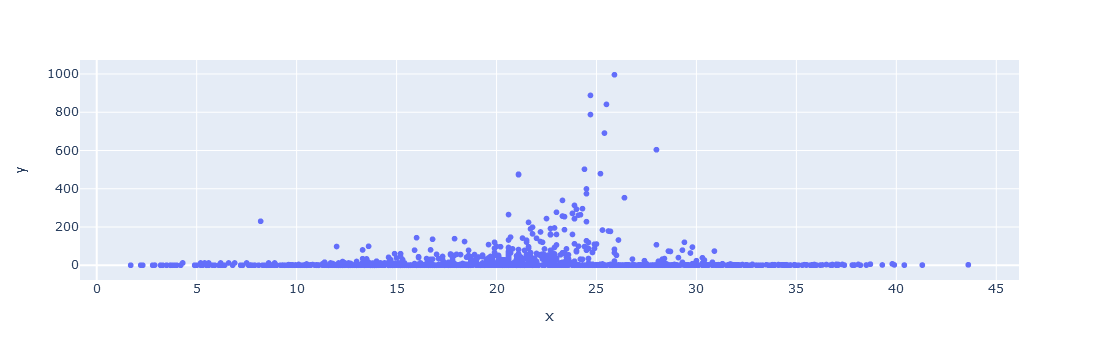

In [33]:
fig = px.scatter(x=core_df['CPH'], y=core_df['KLH'])
fig.show()

We can see that our X-data are plotting in a range between ~0 and ~44%. However, our permeability data have a much broader range - from approximately 0 to >10000mD. Let's address this by setting the range of our axes, and also setting a logarithimic scale for our Y-axis.

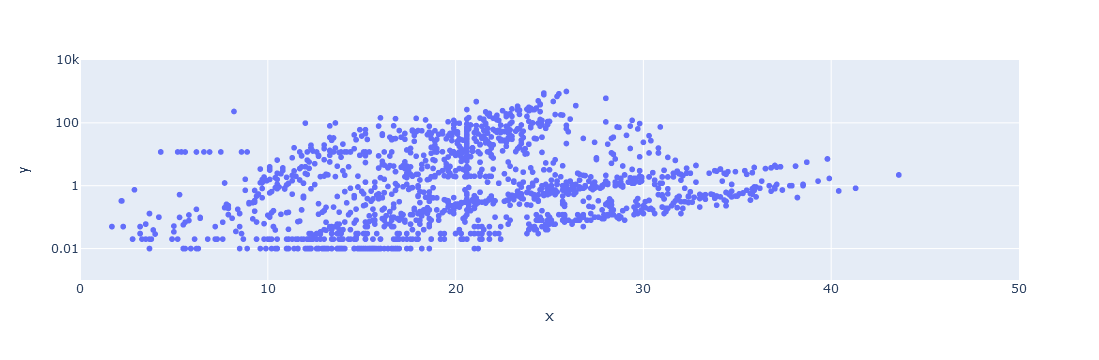

In [30]:
x_limits = [0, 50] # X-axis range

y_limits = [0.001, 10000] # Y-axis range

fig = px.scatter(x=core_df['CPH'], y=core_df['KLH'], log_y=True, range_x=x_limits, range_y=y_limits)

fig.show()

We now have a graph with more suitable axes to view our dataset. However, what if we want to understand which sites the data are from, as well as making it easier to see what an external user is looking at? Let's try that by adding a colour legend, axes titles, and changing the layout of our plot.

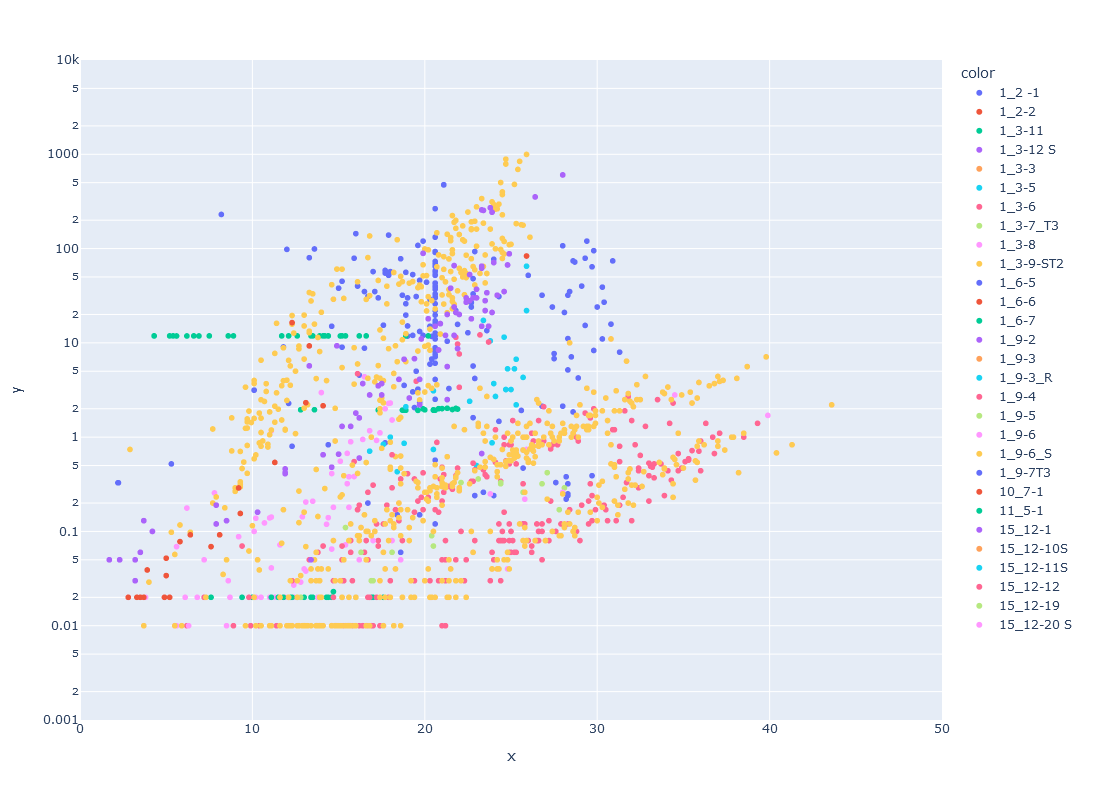

In [39]:
x_limits = [0, 50] # X-axis range
y_limits = [0.001, 10000] # Y-axis range

plot_width = 1000
plot_height = 800

fig = px.scatter(x=core_df['CPH'], y=core_df['KLH'], 
                 log_y=True, 
                 range_x=x_limits, range_y=y_limits,
                 color=core_df['Well'],
                 width=plot_width, height=plot_height)

fig.show()